<a href="https://colab.research.google.com/github/zumizum/SuprevisedLearning/blob/main/CNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Ensure you have the necessary libraries

!pip uninstall shap -y

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping



In [3]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [10]:
# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [11]:
# Fit the model on batches with real-time data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[es])

Epoch 1/10
782/782 [==============================] - 43s 44ms/step - loss: 1.8093 - accuracy: 0.3621 - val_loss: 1.5146 - val_accuracy: 0.4650
Epoch 2/10
782/782 [==============================] - 30s 38ms/step - loss: 1.5009 - accuracy: 0.4557 - val_loss: 1.2766 - val_accuracy: 0.5448
Epoch 3/10
782/782 [==============================] - 38s 49ms/step - loss: 1.3831 - accuracy: 0.5046 - val_loss: 1.0917 - val_accuracy: 0.6128
Epoch 4/10
782/782 [==============================] - 30s 39ms/step - loss: 1.3100 - accuracy: 0.5350 - val_loss: 1.0461 - val_accuracy: 0.6287
Epoch 5/10
782/782 [==============================] - 31s 39ms/step - loss: 1.2568 - accuracy: 0.5561 - val_loss: 1.4132 - val_accuracy: 0.5753
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 1.2045 - accuracy: 0.5761 - val_loss: 1.1553 - val_accuracy: 0.6107
Epoch 7/10
782/782 [==============================] - 31s 40ms/step - loss: 1.1650 - accuracy: 0.5919 - val_loss: 1.1265 - val_accuracy:

In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [13]:
# Print the evaluation metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 1.1976548433303833
Test Accuracy: 0.6258000135421753


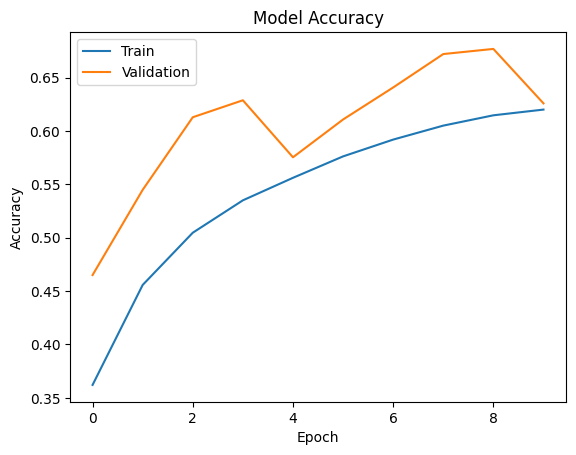

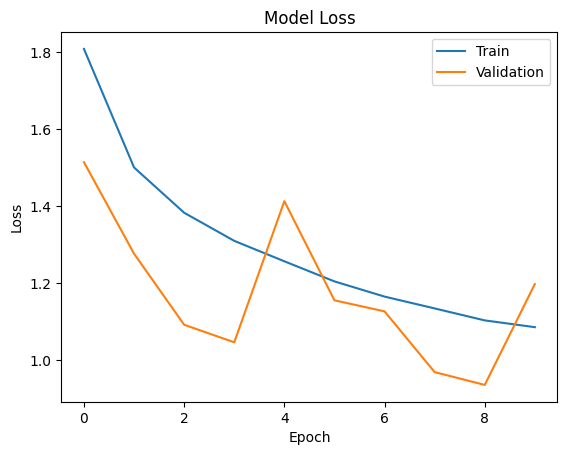

In [14]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
# Use TFGradientExplainer instead of DeepExplainer or GradientExplainer
!pip install shap
import shap
from shap.explainers import GradientExplainer
explainer = GradientExplainer(model, x_train[:100])  # Use TFGradientExplainer for TensorFlow models
shap_values = explainer.shap_values(x_test[:10])

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


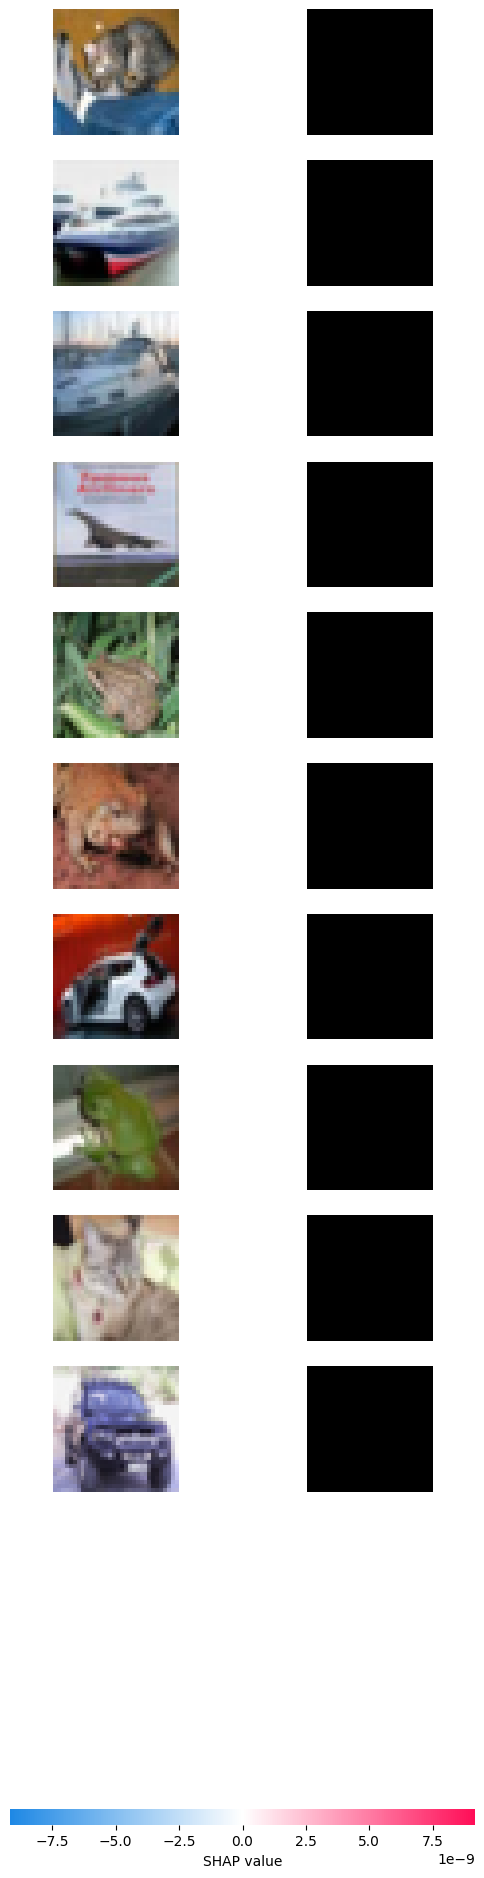

In [17]:
# Plot the SHAP values for the first image in the test set
shap.image_plot(shap_values, x_test[:10])